<a href="https://colab.research.google.com/github/sohaaan/covid19_cvc/blob/master/model_covid19_cvc_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Load Data From CSV File


In [9]:
df = pd.read_csv("cov19_cvc_cleaned3.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Outcome,Age,Gender,Treatment,Ventilated (Y/N),Red_blood_cell_distribution_width,Monocytes(%),White_blood_cell_count,Platelet_Count,Lymphocyte_Count,Neutrophils_Count,Lymphocyte_Count_Binned,Ventilated-No,Ventilated-Yes,Discharge,Admission,Sample_Collection,Recovered,Not Recovered,Age-Binned,Antibiotics,"Antibiotics, O2","Antibiotics, O3-O9","Paracetamol, Antibiotics, O2"
0,0,1,Not Recovered,51,Male,"Antibiotics, O2",Yes,13.2,3.3,21.00,462.00,0.44,19.43,less than 5,0,1,2020-08-08,2020-08-10,2020-08-10,0,1,40-57,0,1,0,0
1,1,2,Not Recovered,65,Female,"Paracetamol, Antibiotics, O2",Yes,40.0,3.0,8.79,180.66,4.39,7.56,less than 5,0,1,2020-08-05,2020-07-24,2020-07-24,0,1,57-70,0,0,0,1
2,2,3,Recovered,32,Male,"Antibiotics, O2",No,11.7,5.3,9.90,336.00,3.47,5.34,less than 5,1,0,2020-08-08,2020-07-22,2020-07-22,1,0,35 less,0,1,0,0
3,3,4,Recovered,36,Female,"Antibiotics, O2",No,13.0,5.0,9.95,240.10,0.80,8.66,less than 5,1,0,2020-08-05,2020-07-19,2020-07-19,1,0,35-40,0,1,0,0
4,4,5,Recovered,46,Male,"Paracetamol, Antibiotics, O2",No,31.0,3.0,14.15,236.58,7.93,13.02,5 to 11,1,0,2020-08-05,2020-07-18,2020-07-18,1,0,40-57,0,0,0,1


## Data pre-processing and selection


Let's first look at columns data types:


In [10]:
df.drop(["Unnamed: 0","Unnamed: 0.1"], axis=1, inplace= True)

In [11]:
df.dtypes

Outcome                               object
Age                                    int64
Gender                                object
Treatment                             object
Ventilated (Y/N)                      object
Red_blood_cell_distribution_width    float64
Monocytes(%)                         float64
White_blood_cell_count               float64
Platelet_Count                       float64
Lymphocyte_Count                     float64
Neutrophils_Count                    float64
Lymphocyte_Count_Binned               object
Ventilated-No                          int64
Ventilated-Yes                         int64
Discharge                             object
Admission                             object
Sample_Collection                     object
Recovered                              int64
Not Recovered                          int64
Age-Binned                            object
Antibiotics                            int64
Antibiotics,  O2                       int64
Antibiotic

In [13]:
feature_df = df[['Age', 'Red_blood_cell_distribution_width', 'Monocytes(%)', 'White_blood_cell_count', 'Platelet_Count', 'Lymphocyte_Count', 'Neutrophils_Count', 'Ventilated-Yes', 'Antibiotics','Antibiotics,  O2','Antibiotics,  O3-O9','Paracetamol, Antibiotics,  O2']]
X = np.asarray(feature_df)
X[0:5]

array([[5.1000e+01, 1.3200e+01, 3.3000e+00, 2.1000e+01, 4.6200e+02,
        4.4000e-01, 1.9430e+01, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00],
       [6.5000e+01, 4.0000e+01, 3.0000e+00, 8.7900e+00, 1.8066e+02,
        4.3900e+00, 7.5600e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [3.2000e+01, 1.1700e+01, 5.3000e+00, 9.9000e+00, 3.3600e+02,
        3.4700e+00, 5.3400e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00],
       [3.6000e+01, 1.3000e+01, 5.0000e+00, 9.9500e+00, 2.4010e+02,
        8.0000e-01, 8.6600e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00],
       [4.6000e+01, 3.1000e+01, 3.0000e+00, 1.4150e+01, 2.3658e+02,
        7.9300e+00, 1.3020e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00]])

In [ ]:
feature_df2 = df[['Age', 'Red_blood_cell_distribution_width', 'Ventilated-Yes', 'Antibiotics','Antibiotics,  O2','Antibiotics,  O3-O9','Paracetamol, Antibiotics,  O2','Recovered']]
X = np.asarray(feature_df2)
X[0:5]

In [14]:
#df['Recovered'] = cell_df['Class'].astype('int')
y = np.asarray(df['Recovered'])
y [0:5]

array([0, 0, 1, 1, 1])

## Train/Test dataset


We split our dataset into train and test set:


In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (82, 12) (82,)
Test set: (21, 12) (21,)


<h2 id="modeling">Modeling (SVM with Scikit-learn)</h2>


The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.


In [16]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

After being fitted, the model can then be used to predict new values:


In [17]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 0, 0])

<h2 id="evaluation">Evaluation</h2>


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.64      1.00      0.78         9

    accuracy                           0.76        21
   macro avg       0.82      0.79      0.76        21
weighted avg       0.85      0.76      0.76        21

Confusion matrix, without normalization
[[7 5]
 [0 9]]


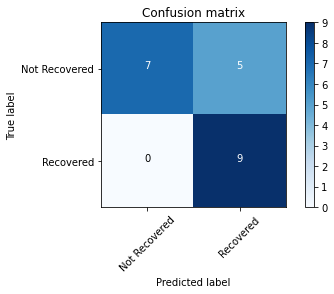

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Recovered','Recovered'],normalize= False,  title='Confusion matrix')

You can also easily use the **f1\_score** from sklearn library:


In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.756456358287022

Let's try the jaccard index for accuracy:


In [24]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.6428571428571429

In [26]:
# write your code here
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label=1))


Avg F1-score: 0.9048
Jaccard score: 0.8000


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.89      0.89      0.89         9

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

Confusion matrix, without normalization
[[11  1]
 [ 1  8]]


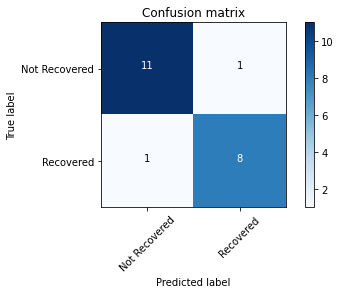

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Recovered','Recovered'],normalize= False,  title='Confusion matrix')

In [30]:
feature_df2 = df[['Age', 'Red_blood_cell_distribution_width', 'Ventilated-Yes', 'Antibiotics','Antibiotics,  O2','Antibiotics,  O3-O9','Paracetamol, Antibiotics,  O2','Recovered']]
X1 = np.asarray(feature_df2)
X1[0:5]

array([[51. , 13.2,  1. ,  0. ,  1. ,  0. ,  0. ,  0. ],
       [65. , 40. ,  1. ,  0. ,  0. ,  0. ,  1. ,  0. ],
       [32. , 11.7,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ],
       [36. , 13. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ],
       [46. , 31. ,  0. ,  0. ,  0. ,  0. ,  1. ,  1. ]])

In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y, test_size=0.2, random_state=4)
print ('Train set:', X_train1.shape,  y_train1.shape)
print ('Test set:', X_test1.shape,  y_test1.shape)

Train set: (82, 8) (82,)
Test set: (21, 8) (21,)


In [35]:
# write your code here
clf3 = svm.SVC(kernel='linear')
clf3.fit(X_train1, y_train1) 
yhat3 = clf3.predict(X_test1)
print("Avg F1-score: %.4f" % f1_score(y_test1, yhat3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test1, yhat3,pos_label=1))


Avg F1-score: 1.0000
Jaccard score: 1.0000


In [36]:
# write your code here
clf3 = svm.SVC(kernel='poly')
clf3.fit(X_train1, y_train1) 
yhat3 = clf3.predict(X_test1)
print("Avg F1-score: %.4f" % f1_score(y_test1, yhat3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test1, yhat3,pos_label=1))


Avg F1-score: 0.9052
Jaccard score: 0.8182
